# Trabalhando com datasets desbalanceados
- Para trabalhar com datasets desbalanceados, vamos usar a biblioteca imbalanced-learn
    - https://imbalanced-learn.org/stable/index.html

In [62]:
# Importando a base de transações
import pandas as pd
base = pd.read_csv('creditcard.csv')

In [63]:
# Visualizando a base
base.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [64]:
# Separando em X e y
X = base.drop('Class',axis=1)
y = base.Class

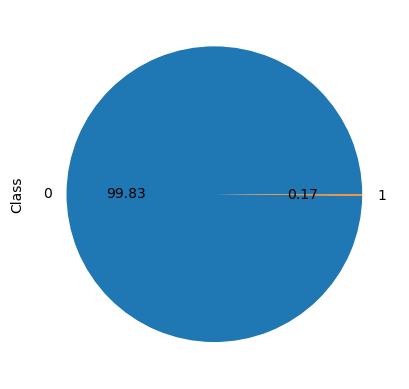

In [65]:
# Visualizando a proporção dessa base
y.value_counts().plot.pie(autopct='%.2f');

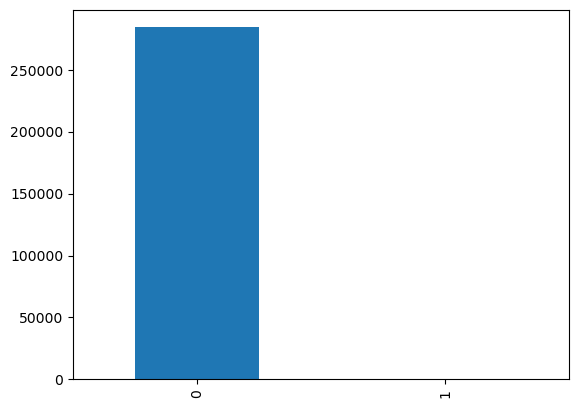

In [66]:
# Visualizando como um gráfico de barras
y.value_counts().plot.bar();

In [67]:
# Contando os valores em cada classe
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [68]:
# Instalando a biblioteca
# !pip install -U imbalanced-learn

### Como podemos resolver esse problema?
- Temos 2 classes:
    - Classe **majoritária**: a que possui **mais** registros
    - Classe **minoritária**: a que possui **menos** registros

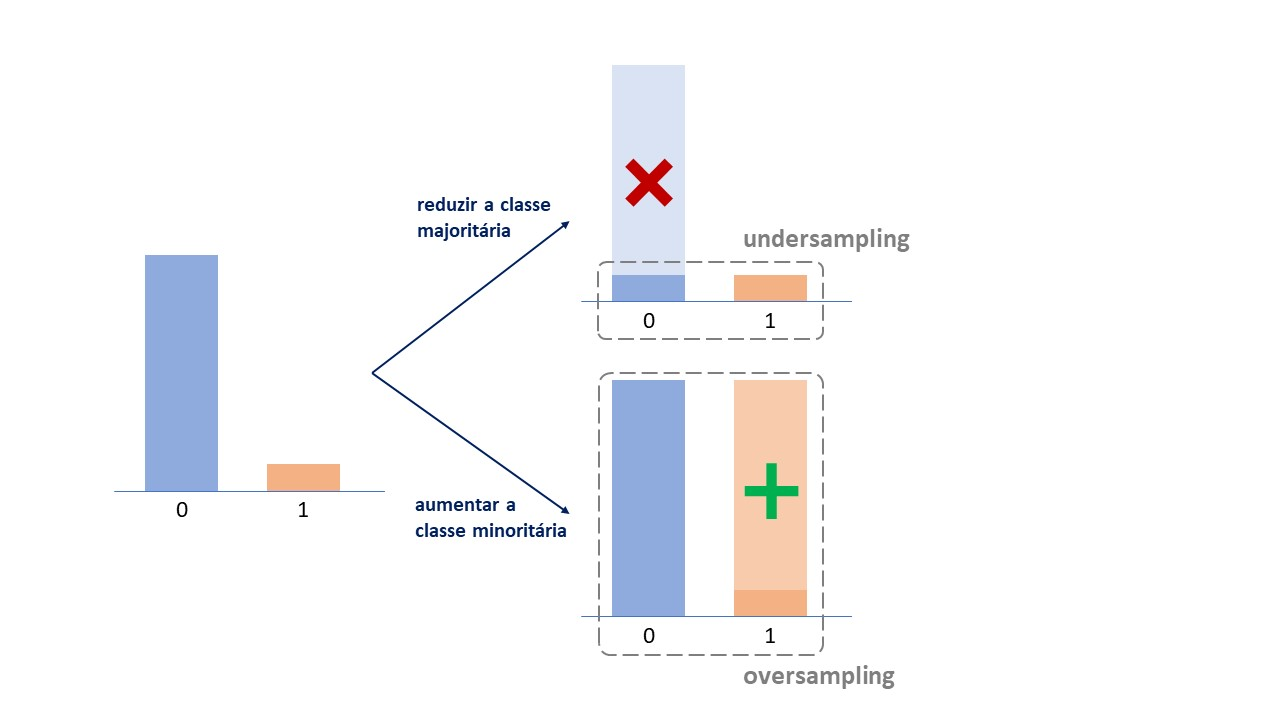

### Reduzindo os registros da classe majoritária
- Vamos retirar dados da classe que possui mais registros
    - Precisamos ter cuidado para que essa retirada não acabe causando perda de  informação (retirando informações que são muito importantes)
    - Também é necessário verificar o tamanho da base restante
- Podemos começar fazendo isso excluindo registros de forma aleatória

In [69]:
# Importando o RandomUnderSampler do imblearn
from imblearn.under_sampling import RandomUnderSampler 

In [70]:
# Definindo o RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [71]:
# Aplicando para X e y
X_res_under, y_res_under = rus.fit_resample(X, y)

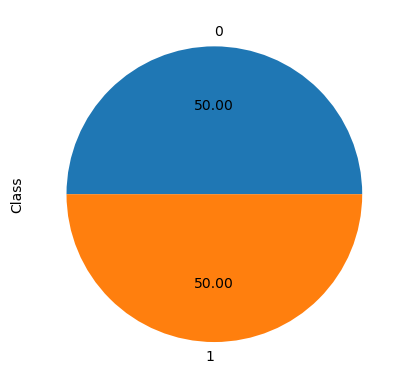

In [72]:
# Visualizando graficamente
y_res_under.value_counts().plot.pie(autopct='%.2f');

In [73]:
# Contando os valores em cada classe
y_res_under.value_counts()

0    492
1    492
Name: Class, dtype: int64

### Aumentando os registros da classe minoritária
- Duplicando os valores de maneira aleatória
    - Precisamos garantir que não vamos ter overfitting por mostrar ao modelo várias vezes os mesmos dados

In [74]:
# Importando o RandomOverSampler do imblearn
from imblearn.over_sampling import RandomOverSampler 

In [75]:
# Instanciando
ros = RandomOverSampler(random_state=42)

In [76]:
# Aplicando para X e y
X_res_over, y_res_over = ros.fit_resample(X, y)

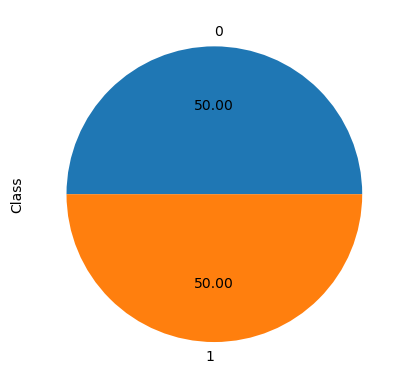

In [77]:
# Visualizando graficamente
y_res_over.value_counts().plot.pie(autopct='%.2f');

In [78]:
# Contando os valores em cada classe
y_res_over.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [79]:
# Visualizando graficamente
import matplotlib.pyplot as plt

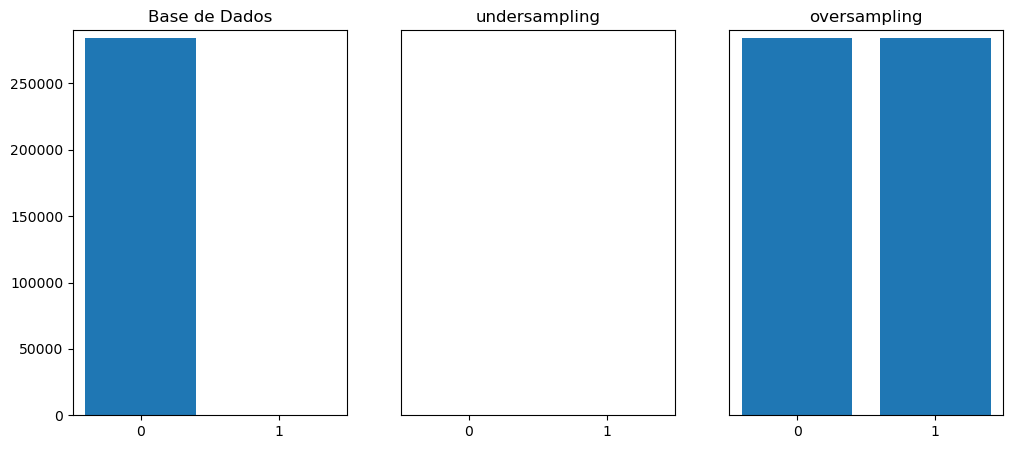

In [80]:
# Plotando os 3 gráficos de barra
fig, ax = plt.subplots(ncols=3,figsize=(12,5))

ax[0].bar(y.value_counts().index,y.value_counts().values)
ax[1].bar(y_res_under.value_counts().index,y_res_under.value_counts().values)
ax[2].bar(y_res_over.value_counts().index,y_res_over.value_counts().values)

ax[0].set(xticks=[0,1],ylim=(0, 290000))
ax[0].set_title('Base de Dados')
ax[1].set(xticks=[0,1],ylim=(0, 290000),yticks=[])
ax[1].set_title('undersampling')
ax[2].set(xticks=[0,1],ylim=(0, 290000),yticks=[])
ax[2].set_title('oversampling')

plt.show()

## Métodos de seleção

In [81]:
# Importando a base
import pandas as pd
base = pd.read_excel('BaseInadimplencia.xlsx')

In [82]:
# Visualizando essa base
base.head(3)

,SaldoConta,SaldoInvestimento,Situacao
0,-1.365390,-3.280278,0
1,-1.992492,-4.158429,0
2,-3.910816,-0.874096,0


In [83]:
# Contando a quantidade de valores
base.Situacao.value_counts()

0    150
1     15
Name: Situacao, dtype: int64

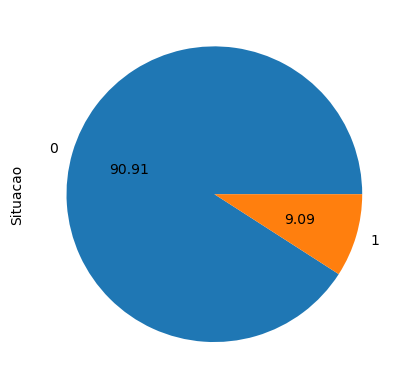

In [84]:
# Visualizando os dados graficamente
base.Situacao.value_counts().plot.pie(autopct='%.2f');

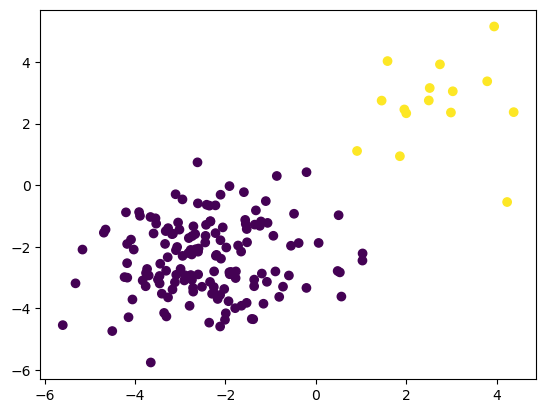

In [85]:
# Visualizando a distribuição dos dados
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao)

plt.show()

## Undersampling

### RandomUnderSampler
- Seleciona os valores de maneira aleatória
- https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler

In [86]:
# Separando X e y
X = base.drop('Situacao',axis=1)
y = base.Situacao

In [87]:
# Definindo o RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler 

In [88]:
# Definindo a nova amostra
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

In [89]:
# Contando os valores
y_res.value_counts()

0    15
1    15
Name: Situacao, dtype: int64

In [90]:
# Verificando a base onde situação = 1
base[base.Situacao == 1]

,SaldoConta,SaldoInvestimento,Situacao
150,1.999168,2.333924,1
151,2.498148,2.749414,1
152,1.585570,4.027849,1
153,1.858754,0.939691,1
154,3.028616,3.047133,1
155,0.911150,1.109671,1
156,4.231165,-0.547074,1
157,2.987803,2.358257,1
158,4.375921,2.370152,1
159,2.518741,3.153611,1


In [91]:
# Verificando X nos índices de 150 a 164
X[150:]

,SaldoConta,SaldoInvestimento
150,1.999168,2.333924
151,2.498148,2.749414
152,1.585570,4.027849
153,1.858754,0.939691
154,3.028616,3.047133
155,0.911150,1.109671
156,4.231165,-0.547074
157,2.987803,2.358257
158,4.375921,2.370152
159,2.518741,3.153611


In [92]:
# Verificando os 15 últimos valores de X_res
X_res[-15:]

,SaldoConta,SaldoInvestimento
150,1.999168,2.333924
151,2.498148,2.749414
152,1.585570,4.027849
153,1.858754,0.939691
154,3.028616,3.047133
155,0.911150,1.109671
156,4.231165,-0.547074
157,2.987803,2.358257
158,4.375921,2.370152
159,2.518741,3.153611


In [93]:
# Agora verificando os 15 primeiros valores de X_res
X_res[:15]

,SaldoConta,SaldoInvestimento
73,-3.313363,-2.778218
18,-0.727013,-3.294633
118,-0.380826,-1.879050
78,-5.163081,-2.090335
76,-3.733867,-2.720219
31,-3.757442,-2.849533
64,-2.670189,-1.588187
141,-3.442754,-2.551067
68,-2.604234,-2.898034
82,-1.932412,-3.766932


In [94]:
# Verificando quais foram os registros que selecionamos para a amostra
base[(base.SaldoConta.isin(X_res.SaldoConta)) & (base.SaldoInvestimento.isin(X_res.SaldoInvestimento)) & (base.Situacao == 0)]

,SaldoConta,SaldoInvestimento,Situacao
9,-3.336193,-1.907078,0
12,-2.110388,-1.787340,0
18,-0.727013,-3.294633,0
19,-1.239118,-1.320269,0
31,-3.757442,-2.849533,0
36,-0.482951,-0.928489,0
64,-2.670189,-1.588187,0
68,-2.604234,-2.898034,0
73,-3.313363,-2.778218,0
76,-3.733867,-2.720219,0


In [95]:
# Guardando em uma variável
linhas = base[(base.SaldoConta.isin(X_res.SaldoConta)) & (base.SaldoInvestimento.isin(X_res.SaldoInvestimento)) & (base.Situacao == 0)].index

In [96]:
# Imprimindo
print(linhas)

Int64Index([9, 12, 18, 19, 31, 36, 64, 68, 73, 76, 78, 82, 110, 118, 141], dtype='int64')


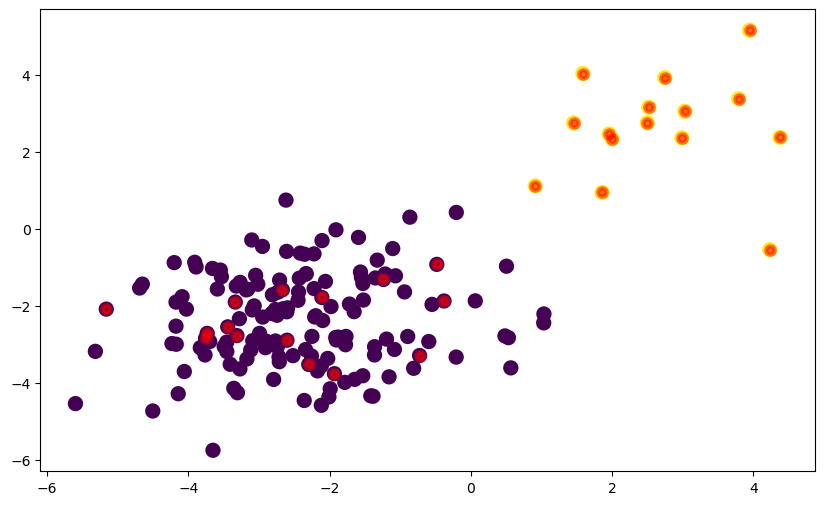

In [97]:
# E visualizando graficamente
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao,linewidths=5)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red',linewidths=3,alpha=0.5)

plt.show()

### ClusterCentroids
- Irá gerar novas amostras baseado no KMeans (que veremos em breve)
- Vai substituir um conjunto (cluster) de amostras pelo seu "centróide"
- https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.ClusterCentroids.html#imblearn.under_sampling.ClusterCentroids

In [98]:
# Importando
from imblearn.under_sampling import ClusterCentroids

In [99]:
# Definindo o ClusterCentroids
cc = ClusterCentroids(random_state=42)

In [100]:
# Criando a amostra dos dados
X_res , y_res = cc.fit_resample(X,y)

C:\Users\guilherme.villas\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\guilherme.villas\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


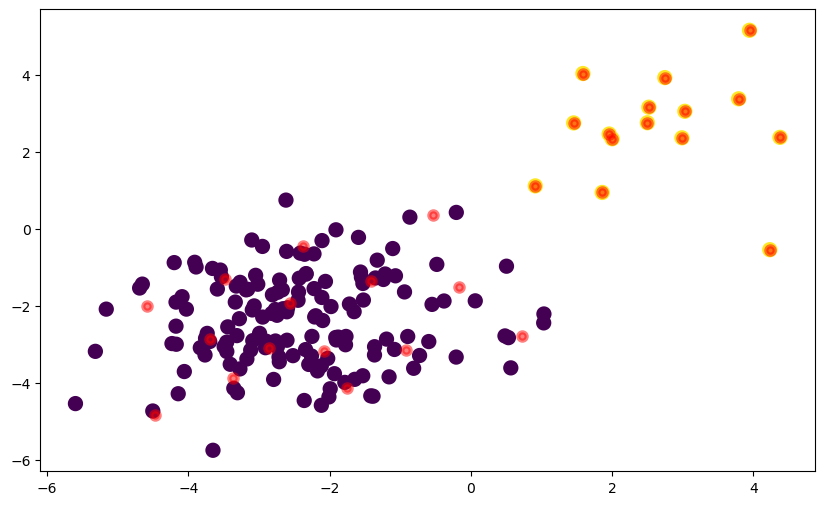

In [101]:
# Visualizando graficamente
# E visualizando graficamente
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao,linewidths=5)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red',linewidths=3,alpha=0.5)

plt.show()

### NearMiss
- Vai manter os mesmos pontos, porém com um método diferente de seleção
- Vai usar o KNN (KNearestNeighbors) para selecionar quais pontos irá manter da amostra, selecionando aqueles com a **menor distância aos pontos da classe minoritária**
    - Retira os pontos, mas consegue manter a região de separação entre as classes
- https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html#imblearn.under_sampling.NearMiss

In [102]:
# Fazendo a reamostragem usando o NearMiss
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res, y_res = nm.fit_resample(X,y)

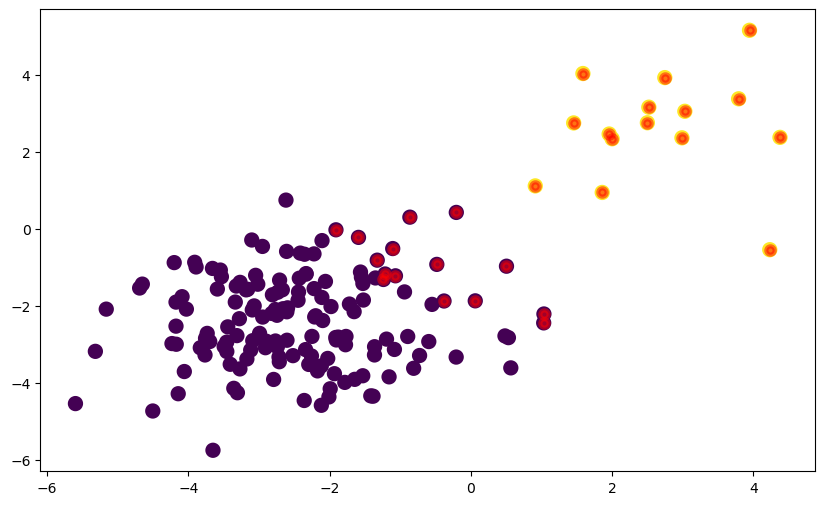

In [103]:
# Vsualizando graficamente
# Visualizando graficamente
# E visualizando graficamente
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao,linewidths=5)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red',linewidths=3,alpha=0.5)

plt.show()

**Existem várias outras formas de fazermos o undersampling e todas elas são explicadas na própria documentação**<br>
**https://imbalanced-learn.org/stable/under_sampling.html#**

## Oversampling

### RandomOverSampler
- Duplica os valores também de maneira aleatória
- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html#imblearn.over_sampling.RandomOverSampler

In [104]:
# Importando
from imblearn.over_sampling import RandomOverSampler

In [105]:
# Definindo o ros
ros = RandomOverSampler(random_state=42,shrinkage=0.01)

In [106]:
# Refazendo nossa amostra
X_res, y_res = ros.fit_resample(X,y)

In [107]:
# Contando os valores
y_res.value_counts()

0    150
1    150
Name: Situacao, dtype: int64

In [108]:
# Sendo a base de Situação = 1
base.loc[base.Situacao ==1]

,SaldoConta,SaldoInvestimento,Situacao
150,1.999168,2.333924,1
151,2.498148,2.749414,1
152,1.585570,4.027849,1
153,1.858754,0.939691,1
154,3.028616,3.047133,1
155,0.911150,1.109671,1
156,4.231165,-0.547074,1
157,2.987803,2.358257,1
158,4.375921,2.370152,1
159,2.518741,3.153611,1


In [109]:
# Podemos ver quantas vezes essa primeira linha foi duplicada
X_res[(X_res.SaldoConta == base.iloc[150,0]) & (X_res.SaldoInvestimento == base.iloc[151,1])]

,SaldoConta,SaldoInvestimento


In [112]:
# E, para visualizar, percorrer todas as linhas
#for i in range(150,166):
    #print(len(X_res[(X_res.SaldoConta == base.iloc[i,0]) & (X_res.SaldoInvestimento == base.iloc[i,1])]))

**Se a repetição dos dados for um problema, podemos utilizar o parâmetro `shrinkage`**
- Quando o parâmetro for passado, ele vai gerar uma "suavização" nos dados

In [113]:
# Visualizando de forma ordenada os valores da base
base.sort_values('SaldoConta',ascending=False)

,SaldoConta,SaldoInvestimento,Situacao
158,4.375921,2.370152,1
156,4.231165,-0.547074,1
162,3.944314,5.150743,1
161,3.790351,3.371406,1
154,3.028616,3.047133,1
...,...,...,...
126,-4.652379,-1.440781,0
86,-4.690569,-1.542231,0
78,-5.163081,-2.090335,0
112,-5.317297,-3.186625,0


In [114]:
# Visualizando todos os valores do X_res
X_res.sort_values('SaldoConta',ascending=False)

,SaldoConta,SaldoInvestimento
276,4.380194,2.378921
296,4.379279,2.363844
298,4.378701,2.357354
218,4.376197,2.373000
158,4.375921,2.370152
...,...,...
126,-4.652379,-1.440781
86,-4.690569,-1.542231
78,-5.163081,-2.090335
112,-5.317297,-3.186625


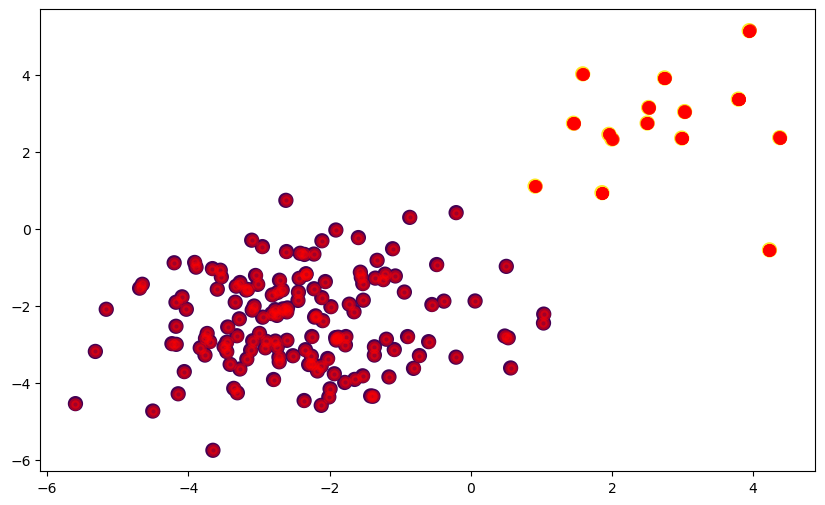

In [115]:
# Vsualizando graficamente
# Vsualizando graficamente
# Visualizando graficamente
# E visualizando graficamente
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao,linewidths=5)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red',linewidths=3,alpha=0.5)

plt.show()

### SMOTE e ADASYN
- Ao invés de duplicar os valores, serão geradas novas amostras utilizando o KNN
- Sendo os 3 vizinhos mais próximos de Xi mostrados na figura, é selecionado um desses vizinhos e o novo ponto de dado é definido em uma distância aleatória entre Xi e o vizinho selecionado
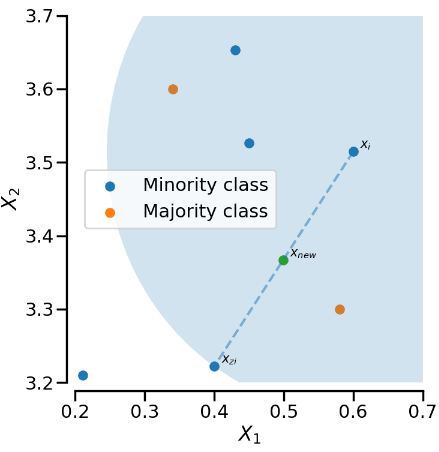
- A principal diferença do ADASYN é que ele vai **gerar mais observações para aqueles pontos da classe minoritária que tiverem mais observações da classe majoritária na região dos vizinhos mais próximos**, já se não tiver nenhuma observação da classe majoritária nos vizinhos mais próximos ele não irá gerar nenhum ponto

In [116]:
# Utilizando o SMOTE
# Utilizando o SMOTE
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

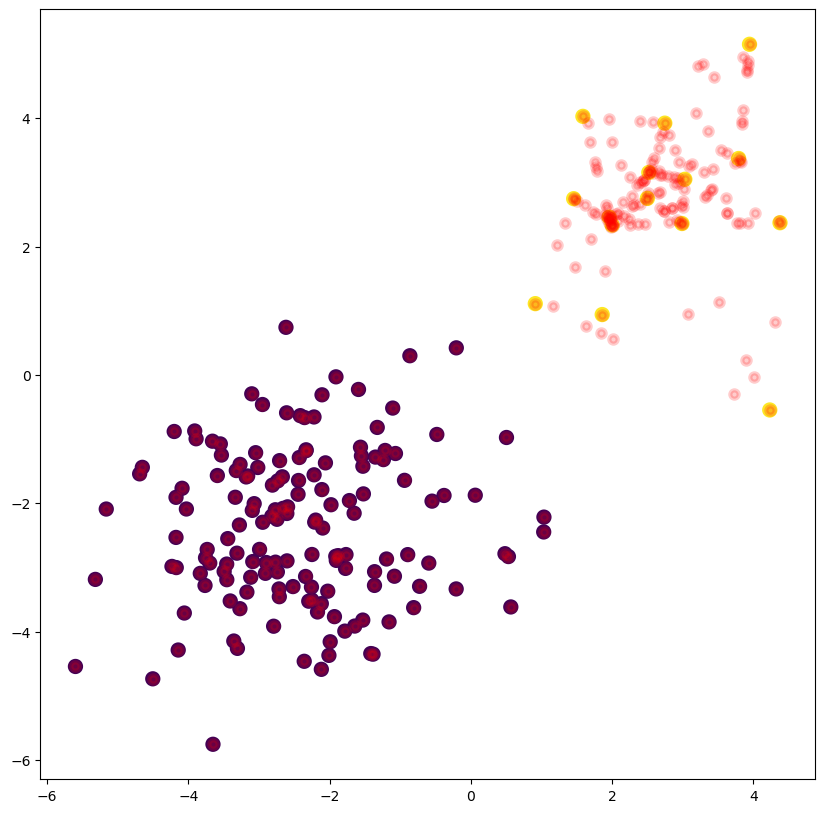

In [117]:
# Vsualizando graficamente
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao,linewidths=5)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red',linewidths=3,alpha=0.2)

plt.show()

In [118]:

# Utilizando ADASYN
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)

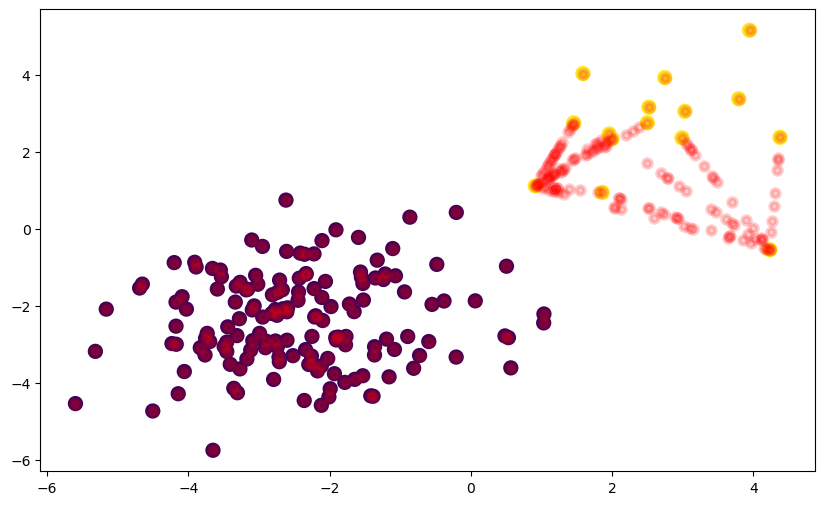

In [119]:
# Vsualizando graficamente

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao,linewidths=5)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red',linewidths=3,alpha=0.2)

plt.show()

**Também existem várias outras formas de fazermos o oversampling e todas elas são explicadas na própria documentação**<br>
**https://imbalanced-learn.org/stable/over_sampling.html**